In [1]:
import matplotlib.pyplot as plt
import numpy as np
import cv2
import os
import PIL
import tensorflow as tf

from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential

In [2]:
dataset_url = "https://storage.googleapis.com/download.tensorflow.org/example_images/flower_photos.tgz"
data_dir = tf.keras.utils.get_file('flower_photos', origin=dataset_url,  cache_dir='E:\Deep Learning', untar=True)
# cache_dir indicates where to download data. I specified . which means current directory
# untar true will unzip it

In [3]:
data_dir

'E:\\Deep Learning\\datasets\\flower_photos'

In [4]:
import pathlib
data_dir = pathlib.Path(data_dir)
data_dir

WindowsPath('E:/Deep Learning/datasets/flower_photos')

In [5]:
image_count = len(list(data_dir.glob('*/*.jpg')))
print(image_count)

3670


In [6]:
list(data_dir.glob('*\*.jpg'))[:10]

[WindowsPath('E:/Deep Learning/datasets/flower_photos/daisy/100080576_f52e8ee070_n.jpg'),
 WindowsPath('E:/Deep Learning/datasets/flower_photos/daisy/10140303196_b88d3d6cec.jpg'),
 WindowsPath('E:/Deep Learning/datasets/flower_photos/daisy/10172379554_b296050f82_n.jpg'),
 WindowsPath('E:/Deep Learning/datasets/flower_photos/daisy/10172567486_2748826a8b.jpg'),
 WindowsPath('E:/Deep Learning/datasets/flower_photos/daisy/10172636503_21bededa75_n.jpg'),
 WindowsPath('E:/Deep Learning/datasets/flower_photos/daisy/102841525_bd6628ae3c.jpg'),
 WindowsPath('E:/Deep Learning/datasets/flower_photos/daisy/1031799732_e7f4008c03.jpg'),
 WindowsPath('E:/Deep Learning/datasets/flower_photos/daisy/10391248763_1d16681106_n.jpg'),
 WindowsPath('E:/Deep Learning/datasets/flower_photos/daisy/10437754174_22ec990b77_m.jpg'),
 WindowsPath('E:/Deep Learning/datasets/flower_photos/daisy/10437770546_8bb6f7bdd3_m.jpg')]

In [7]:
roses = list(data_dir.glob('roses/*'))
roses[:5]

[WindowsPath('E:/Deep Learning/datasets/flower_photos/roses/10090824183_d02c613f10_m.jpg'),
 WindowsPath('E:/Deep Learning/datasets/flower_photos/roses/102501987_3cdb8e5394_n.jpg'),
 WindowsPath('E:/Deep Learning/datasets/flower_photos/roses/10503217854_e66a804309.jpg'),
 WindowsPath('E:/Deep Learning/datasets/flower_photos/roses/10894627425_ec76bbc757_n.jpg'),
 WindowsPath('E:/Deep Learning/datasets/flower_photos/roses/110472418_87b6a3aa98_m.jpg')]

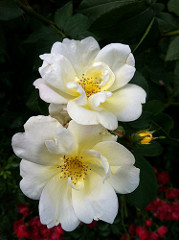

In [8]:
PIL.Image.open(str(roses[0]))

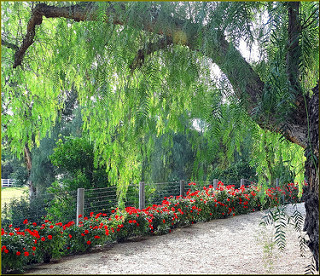

In [9]:
PIL.Image.open(str(roses[5]))

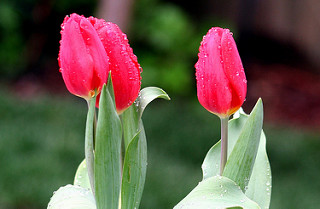

In [10]:
tulips = list(data_dir.glob('tulips/*'))

PIL.Image.open(str(tulips[0]))

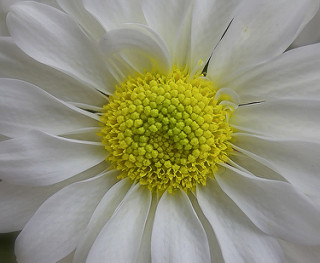

In [11]:
daisy = list(data_dir.glob('daisy/*'))
PIL.Image.open(str(daisy[0]))

In [12]:
# create a dict for flowers_images_dict

In [13]:
flowers_image_dict = {
    'roses' :list(data_dir.glob('roses/*')),
    'daisy':list(data_dir.glob('daisy/*')),
    'dandelion' :list(data_dir.glob('dandelion/*')),
    'sunflowers':list(data_dir.glob('sunflowers/*')),
    'tulips':list(data_dir.glob('tulips/*'))
}

In [14]:
flowers_labels_dict = {
    'roses': 0,
    'daisy': 1,
    'dandelion': 2,
    'sunflowers': 3,
    'tulips': 4,
}

In [15]:
flowers_image_dict['roses'][:4]

[WindowsPath('E:/Deep Learning/datasets/flower_photos/roses/10090824183_d02c613f10_m.jpg'),
 WindowsPath('E:/Deep Learning/datasets/flower_photos/roses/102501987_3cdb8e5394_n.jpg'),
 WindowsPath('E:/Deep Learning/datasets/flower_photos/roses/10503217854_e66a804309.jpg'),
 WindowsPath('E:/Deep Learning/datasets/flower_photos/roses/10894627425_ec76bbc757_n.jpg')]

In [16]:
str(flowers_image_dict['roses'][0])

'E:\\Deep Learning\\datasets\\flower_photos\\roses\\10090824183_d02c613f10_m.jpg'

In [17]:
image = cv2.imread(str(flowers_image_dict['roses'][0]))
image

array([[[ 0, 15,  6],
        [ 0, 15,  6],
        [ 0, 17,  8],
        ...,
        [24, 51, 31],
        [25, 52, 32],
        [26, 53, 33]],

       [[ 7, 22, 14],
        [ 7, 22, 14],
        [ 6, 21, 13],
        ...,
        [20, 46, 30],
        [23, 49, 33],
        [25, 51, 35]],

       [[12, 23, 15],
        [12, 23, 15],
        [11, 22, 14],
        ...,
        [20, 42, 30],
        [23, 45, 33],
        [26, 48, 36]],

       ...,

       [[19, 30, 27],
        [14, 24, 18],
        [12, 20, 13],
        ...,
        [ 4, 13,  3],
        [ 0,  8,  1],
        [ 0,  5,  0]],

       [[19, 30, 28],
        [18, 27, 24],
        [15, 23, 16],
        ...,
        [ 3, 12,  2],
        [ 1,  9,  2],
        [ 0,  7,  2]],

       [[ 9, 19, 19],
        [17, 25, 24],
        [22, 29, 24],
        ...,
        [ 1, 12,  2],
        [ 2, 10,  3],
        [ 3, 11,  4]]], dtype=uint8)

In [18]:
image.shape

(240, 179, 3)

In [19]:
cv2.resize(image,(180,180)).shape

(180, 180, 3)

In [20]:
for flower_name, images in flowers_image_dict.items():
    print(flower_name)
    print(len(images))

roses
641
daisy
633
dandelion
898
sunflowers
699
tulips
799


In [21]:
X,y = [],[]

for flower_name, images in flowers_image_dict.items():
    for image in images:
        img = cv2.imread(str(image))
        resized = cv2.resize(img,(180,180))
        X.append(resized)
        y.append(flowers_labels_dict[flower_name])



In [22]:
y[:1]

[0]

In [23]:
X[0]

array([[[ 1, 16,  7],
        [ 1, 16,  7],
        [ 1, 17,  9],
        ...,
        [23, 50, 31],
        [25, 51, 32],
        [26, 52, 33]],

       [[10, 23, 15],
        [10, 23, 15],
        [ 9, 22, 14],
        ...,
        [20, 44, 30],
        [23, 47, 33],
        [26, 50, 36]],

       [[13, 20, 13],
        [12, 20, 13],
        [11, 19, 12],
        ...,
        [21, 43, 30],
        [22, 45, 31],
        [25, 48, 34]],

       ...,

       [[12, 24, 18],
        [11, 22, 15],
        [12, 21, 11],
        ...,
        [ 7, 14,  7],
        [ 2,  8,  2],
        [ 0,  2,  0]],

       [[19, 30, 28],
        [16, 26, 21],
        [14, 22, 15],
        ...,
        [ 3, 12,  2],
        [ 0,  8,  1],
        [ 0,  6,  1]],

       [[11, 21, 20],
        [17, 25, 24],
        [21, 28, 23],
        ...,
        [ 1, 12,  2],
        [ 2, 10,  3],
        [ 3, 10,  4]]], dtype=uint8)

In [24]:
X = np.array(X)
y = np.array(y)

In [25]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

In [26]:
X_trian_scaled = X_train/255
X_test_scaled = X_test/255

In [27]:
#cnn = model.Sequential([

num_classes = 5

model = Sequential([
  layers.Conv2D(16, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(32, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(64, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Flatten(),
  layers.Dense(128, activation='relu'),
  layers.Dense(num_classes)
])

model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])
              
model.fit(X_trian_scaled, y_train, epochs=3)          


Epoch 1/3
86/86 [==============================] - 60s 676ms/step - loss: 1.3791 - accuracy: 0.4055
Epoch 2/3
86/86 [==============================] - 58s 672ms/step - loss: 1.0220 - accuracy: 0.5807
Epoch 3/3
86/86 [==============================] - 74s 868ms/step - loss: 0.8553 - accuracy: 0.6722


In [28]:
model.evaluate(X_test_scaled, y_test)

29/29 [==============================] - 7s 229ms/step - loss: 1.0083 - accuracy: 0.6198


[1.008272647857666, 0.6198257207870483]

In [29]:
from sklearn.metrics import confusion_matrix , classification_report
import numpy as np
y_pred = model.predict(X_test_scaled)
y_pred_classes = [np.argmax(element) for element in y_pred]
0
print("Classification Report: \n", classification_report(y_test, y_pred_classes))

29/29 [==============================] - 6s 217ms/step
Classification Report: 
               precision    recall  f1-score   support

           0       0.53      0.38      0.44       176
           1       0.56      0.68      0.61       154
           2       0.83      0.57      0.68       226
           3       0.73      0.66      0.69       150
           4       0.54      0.80      0.65       212

    accuracy                           0.62       918
   macro avg       0.64      0.62      0.61       918
weighted avg       0.64      0.62      0.62       918



In [30]:
import matplotlib.pyplot as plt
import numpy as np
import cv2
import os
import PIL
import tensorflow as tf

from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential

data_aug = keras.Sequential([
    layers.experimental.preprocessing.RandomContrast(0.9),
])

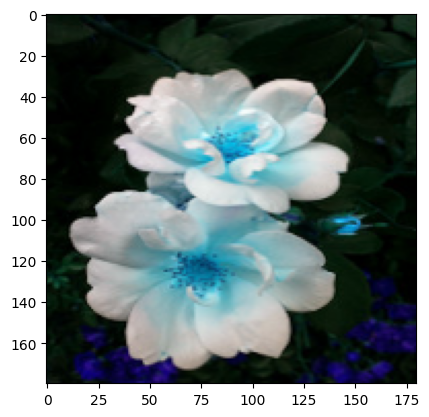

In [31]:
plt.imshow(X[0])